**Obesity levels Data Set Analysis Using AutoML**


**Abstract**

**AUTOML:**

Auto ml selects the best model for our dataset by evaluating many models for us.

Here below we are going to use AUTOML to predict the gender of person using other variables such as height,weight,age and obesity level etc (ie: **multiple classification** will be done here).

By performing automl we will get the imp variables and the most effective model for our dataset as well. 

In [ ]:
pip install h2o
#Installing H20


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 36 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=71b8a2f50b07f5289b182c56c08ad74bceef533cffe1b84cc575e0fc61f720d2
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [ ]:
# import the library
# importing H20 automl 
#It can do data prepossesing it self like categorical encoding coversion etc. 
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
#mine
import h2o
from h2o.automl import H2OAutoML
import os
import pandas as pd

In [ ]:
h2o.init()
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsuk9jv8_
  JVM stdout: /tmp/tmpsuk9jv8_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsuk9jv8_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_ztibi5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
#data2=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
data.name = "data"
data.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [46]:
data.corr().unstack().sort_values().drop_duplicates()
#checking correlation between variables
#mine

TUE     Age      -0.296931
FAF     Age      -0.144938
FCVC    TUE      -0.101135
TUE     Weight   -0.071561
Weight  FAF      -0.051436
Age     CH2O     -0.045304
NCP     Age      -0.043944
Height  FCVC     -0.038121
        Age      -0.025958
TUE     CH2O      0.011965
Age     FCVC      0.016291
FAF     FCVC      0.019939
NCP     TUE       0.036326
FCVC    NCP       0.042216
TUE     Height    0.051912
CH2O    NCP       0.057088
FAF     TUE       0.058562
FCVC    CH2O      0.068461
Weight  NCP       0.107469
NCP     FAF       0.129504
FAF     CH2O      0.167236
Weight  CH2O      0.200575
        Age       0.202560
CH2O    Height    0.213376
FCVC    Weight    0.216125
Height  NCP       0.243672
FAF     Height    0.294709
Height  Weight    0.463136
Age     Age       1.000000
dtype: float64

In [ ]:
#Importing our dataset with H2O.
df = h2o.import_file('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.types

{'Gender': 'enum',
 'Age': 'real',
 'Height': 'real',
 'Weight': 'real',
 'family_history_with_overweight': 'enum',
 'FAVC': 'enum',
 'FCVC': 'real',
 'NCP': 'real',
 'CAEC': 'enum',
 'SMOKE': 'enum',
 'CH2O': 'real',
 'SCC': 'enum',
 'FAF': 'real',
 'TUE': 'real',
 'CALC': 'enum',
 'MTRANS': 'enum',
 'NObeyesdad': 'enum'}

In [ ]:
df.describe()

Rows:2111
Cols:17

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
type,enum,real,real,real,enum,enum,real,real,enum,enum,real,enum,real,real,enum,enum,enum
mins,,14.0,1.45,39.0,,,1.0,1.0,,,1.0,,0.0,0.0,,,
mean,,24.312599908574136,1.7016773533870204,86.58605812648032,,,2.419043061582189,2.6856280497394596,,,2.0080114040738986,,1.0102976958787304,0.6578659237328283,,,
maxs,,61.0,1.98,173.0,,,3.0,4.0,,,3.0,,3.0,2.0,,,
sigma,,6.345968273732234,0.09330481986792,26.191171745204677,,,0.5339265785033,0.7780386488418612,,,0.6129534517968722,,0.8505924308366978,0.6089272596763782,,,
zeros,,0,0,0,,,0,0,,,0,,411,557,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.8,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [ ]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])
#mine

In [ ]:
df_train

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
Female,23,1.5,55,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
Male,22,1.64,53,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,22,1.72,68,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight
Female,21,1.72,80,yes,yes,2,3,Frequently,no,2,yes,2,1,Sometimes,Public_Transportation,Overweight_Level_II
Male,22,1.65,56,no,no,3,3,Sometimes,no,3,no,2,0,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "NObeyesdad"
x = df.columns
x.remove(y)

In [ ]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters. 
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", tho they are really good. 
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [ ]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which 
#variable will it be using for the prediction purposes. 
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)
#taken from references

AutoML progress: |
23:10:30.679: Project: AutoML_1_20221107_231030
23:10:30.680: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:10:30.681: Setting stopping tolerance adaptively based on the training frame: 0.026216125254653815
23:10:30.681: Build control seed: 10
23:10:30.683: training frame: Frame key: AutoML_1_20221107_231030_training_py_2_sid_8aa3    cols: 17    rows: 1455  chunks: 8    size: 96597  checksum: 7889843260882297979
23:10:30.683: validation frame: Frame key: py_4_sid_8aa3    cols: 17    rows: 335  chunks: 8    size: 62433  checksum: -8781215506776447283
23:10:30.683: leaderboard frame: Frame key: py_4_sid_8aa3    cols: 17    rows: 335  chunks: 8    size: 62433  checksum: -8781215506776447283
23:10:30.684: blending frame: NULL
23:10:30.684: response column: NObeyesdad
23:10:30.684: fold column: null
23:10:30.684: weights column: null
23:10:30.714: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20221107_231030


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    70                 490                         341809                 2            6            5.9898        3             64            50.8755

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 5.105368488179247e-06
RMSE: 0.0022595062487586193
LogLoss: 0.0011865501511681713
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error    Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  -------  ---------
187                    0                0                 0                  0                   0                     0                      0        0 / 187
0                      201              0                 0                  0                   0                     0                      0        0 / 201
0                      0                239               0                  0                   0                     0                      0        0 / 239
0                      0                0                 204                0                   0                     0                      0        0 / 204
0                      0                0                 0                  228                 0                     0                      0        0 / 228
0                      0                0                 0                  0                   190                   0                      0        0 / 190
0                      0                0                 0                  0                   0                     206                    0        0 / 206
187                    201              239               204                228                 190                   206                    0        0 / 1,455

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1
7    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.03140892628076408
RMSE: 0.17722563663523425
LogLoss: 0.12668954730335244
Mean Per-Class Error: 0.03531168257353255
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
35                     1                0                 0                  0                   0                     0                      0.0277778  1 / 36
1                      42               0     

**Importatnt Variable: **

Weight

Height

Gender

FCVC

Age

are the most importatnt variables for predicitng the obesity levels.


In [ ]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .

lb = aml.leaderboard

In [ ]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
GBM_5_AutoML_1_20221107_231030,0.0353117,0.12669,0.177226,0.0314089
GBM_3_AutoML_1_20221107_231030,0.036872,0.136502,0.18049,0.0325765
GBM_4_AutoML_1_20221107_231030,0.0391098,0.120658,0.169716,0.0288036
GBM_2_AutoML_1_20221107_231030,0.0399486,0.118608,0.178667,0.031922
GBM_1_AutoML_1_20221107_231030,0.0471979,0.133315,0.195453,0.038202
XGBoost_3_AutoML_1_20221107_231030,0.0514537,0.145254,0.2029,0.0411685
XGBoost_2_AutoML_1_20221107_231030,0.0570996,0.176376,0.22628,0.0512025
DRF_1_AutoML_1_20221107_231030,0.0612555,0.260104,0.275542,0.0759232
XGBoost_1_AutoML_1_20221107_231030,0.0697728,0.229173,0.255777,0.0654218
XRT_1_AutoML_1_20221107_231030,0.0714365,0.31213,0.304909,0.0929697


In [ ]:
#Using the leader model for prediction. 
OverWeight_pred=aml.leader.predict(df_test)
#taken from references

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
OverWeight_pred.head()
#predicitions

predict,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Normal_Weight,0.000334207,0.996637,0.000216506,0.000138635,6.98467e-05,0.00227102,0.000332483
Obesity_Type_I,0.000255662,0.0032374,0.993337,0.000506469,0.000138763,0.000979254,0.00154591
Normal_Weight,0.000184718,0.999188,5.55164e-05,9.20255e-05,2.90963e-05,0.000151637,0.000299235
Normal_Weight,3.91835e-05,0.989199,5.0774e-05,3.27232e-05,4.27897e-05,0.0031125,0.0075231
Obesity_Type_I,0.000116532,0.000300499,0.989781,5.99714e-05,5.99523e-05,0.00528058,0.0044012
Overweight_Level_II,0.000240576,0.000838608,0.00217154,4.10061e-05,3.62937e-05,0.0036079,0.993064
Normal_Weight,0.000681038,0.608959,0.0025324,0.000626555,0.000569372,0.245873,0.140758
Overweight_Level_II,1.54514e-05,6.82669e-05,0.000392109,2.98045e-05,1.32834e-05,0.000212964,0.999268
Normal_Weight,1.84459e-05,0.998714,6.11349e-05,1.76689e-05,1.44941e-05,0.00083209,0.000342091
Normal_Weight,0.000128784,0.999298,6.32045e-05,2.73541e-05,2.74626e-05,0.000274999,0.00018007


In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.02314744426228018
RMSE: 0.1521428416399542
LogLoss: 0.08293059321513715
Mean Per-Class Error: 0.03153048185296216
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
48                     1                0                 0                  0                   0                     0                      0.0204082  1 / 49
2                      40               0                 0                  0                   0                     0                      0.047619   2 / 42
0                      0                58                1                  0                   0                     0                      0.0169492  1 / 59
0                      0                1                 40                 0                   0                     0                      0.0243902  1 / 41
0                      1                0                 0                  40                  0                     0                      0.0243902  1 / 41
0                      2                0                 0                  0                   42                    2                      0.0869565  4 / 46
0                      0                0                 0                  0                   0                     43                     0          0 / 43
50                     44               59                41                 40                  42                    45                     0.0311526  10 / 321

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.968847
2    0.996885
3    0.996885
4    0.996885
5    0.996885
6    1
7    1

In [ ]:

model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids
#all the models that were used in the automl are below

['GBM_5_AutoML_1_20221107_231030',
 'GBM_3_AutoML_1_20221107_231030',
 'GBM_4_AutoML_1_20221107_231030',
 'GBM_2_AutoML_1_20221107_231030',
 'GBM_1_AutoML_1_20221107_231030',
 'XGBoost_3_AutoML_1_20221107_231030',
 'XGBoost_2_AutoML_1_20221107_231030',
 'DRF_1_AutoML_1_20221107_231030',
 'XGBoost_1_AutoML_1_20221107_231030',
 'XRT_1_AutoML_1_20221107_231030']

In [ ]:
aml.leader.confusion_matrix(df_test)
#Using confusion matrix to 
#mine

Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,Error,Rate
48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0204082,1 / 49
2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0476190,2 / 42
0.0,0.0,58.0,1.0,0.0,0.0,0.0,0.0169492,1 / 59
0.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0243902,1 / 41
0.0,1.0,0.0,0.0,40.0,0.0,0.0,0.0243902,1 / 41
0.0,2.0,0.0,0.0,0.0,42.0,2.0,0.0869565,4 / 46
0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0 / 43
50.0,44.0,59.0,41.0,40.0,42.0,45.0,0.0311526,10 / 321


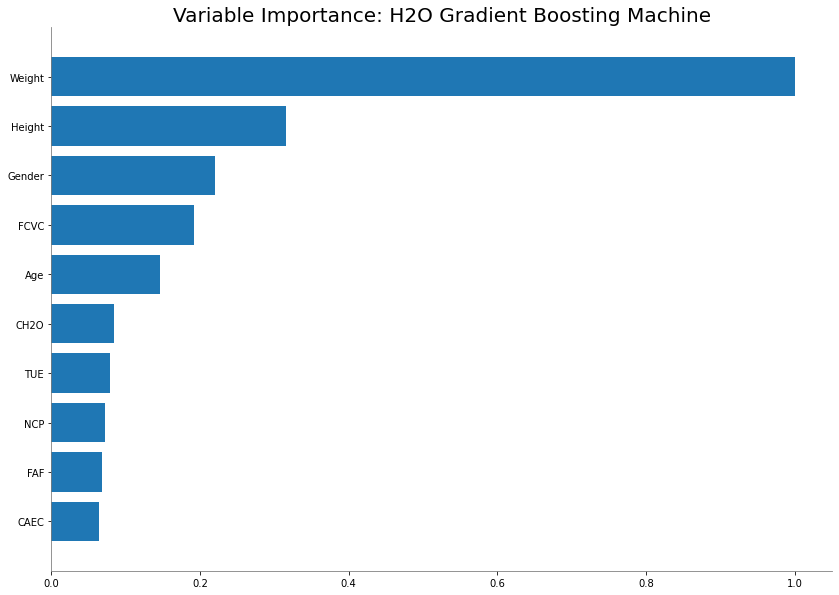

<Figure size 432x288 with 0 Axes>

In [ ]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.
#taken from references

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#we are using xgboost model as well to predict, while it's still not in the top of the aml leader board.

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221107_231030


Model Summary: 
    number_of_trees
--  -----------------
    65

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.002165057933596831
RMSE: 0.04653018303850557
LogLoss: 0.024910705140268687
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error    Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  -------  ---------
187                    0                0                 0                  0                   0                     0                      0        0 / 187
0                      201              0                 0                  0                   0                     0                      0        0 / 201
0                      0                239               0                  0                   0                     0                      0        0 / 239
0                      0                0                 204                0                   0                     0                      0        0 / 204
0                      0                0                 0                  228                 0                     0                      0        0 / 228
0                      0                0                 0                  0                   190                   0                      0        0 / 190
0                      0                0                 0                  0                   0                     206                    0        0 / 206
187                    201              239               204                228                 190                   206                    0        0 / 1,455

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1
7    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.041168485388747775
RMSE: 0.20290018577800212
LogLoss: 0.14525398833408193
Mean Per-Class Error: 0.05145368088304121
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
34                     2                0                 0                  0                   0                     0                      0.0555556  2 / 36
2                      41               0                 0                  0                   0                     1                      0.0681818  3 / 44
0                      0                50                0                  0                   0                     3                      0.0566038  3 / 53
0                      0                2                 50                 0                   0                     0                      0.0384615  2 

In [ ]:

out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])


In [ ]:
out.params


{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20221107_231030',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20221107_231030'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221107_231030_training_py_2_sid_8aa3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221107_231030_training_py_2_sid_8aa3'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221107_231030_training_py_2_sid_8aa3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221107_231030_training_py_2_sid_8aa3'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [ ]:

out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'multi:softprob',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'num_class': 7,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221107_231030


Model Summary: 
    number_of_trees
--  -----------------
    65

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.002165057933596831
RMSE: 0.04653018303850557
LogLoss: 0.024910705140268687
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error    Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  -------  ---------
187                    0                0                 0                  0                   0                     0                      0        0 / 187
0                      201              0                 0                  0                   0                     0                      0        0 / 201
0                      0                239               0                  0                   0                     0                      0        0 / 239
0                      0                0                 204                0                   0                     0                      0        0 / 204
0                      0                0                 0                  228                 0                     0                      0        0 / 228
0                      0                0                 0                  0                   190                   0                      0        0 / 190
0                      0                0                 0                  0                   0                     206                    0        0 / 206
187                    201              239               204                228                 190                   206                    0        0 / 1,455

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1
7    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.041168485388747775
RMSE: 0.20290018577800212
LogLoss: 0.14525398833408193
Mean Per-Class Error: 0.05145368088304121
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
34                     2                0                 0                  0                   0                     0                      0.0555556  2 / 36
2                      41               0                 0                  0                   0                     1                      0.0681818  3 / 44
0                      0                50                0                  0                   0                     3                      0.0566038  3 / 53
0                      0                2                 50                 0                   0                     0                      0.0384615  2 

In [ ]:
out.confusion_matrix(df_test)
#confusuion matrix for xgboost method 

Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,Error,Rate
48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0204082,1 / 49
2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0476190,2 / 42
0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0 / 59
0.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0243902,1 / 41
0.0,0.0,0.0,1.0,40.0,0.0,0.0,0.0243902,1 / 41
0.0,2.0,0.0,0.0,0.0,44.0,0.0,0.0434783,2 / 46
0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0 / 43
50.0,43.0,60.0,41.0,40.0,44.0,43.0,0.0218069,7 / 321


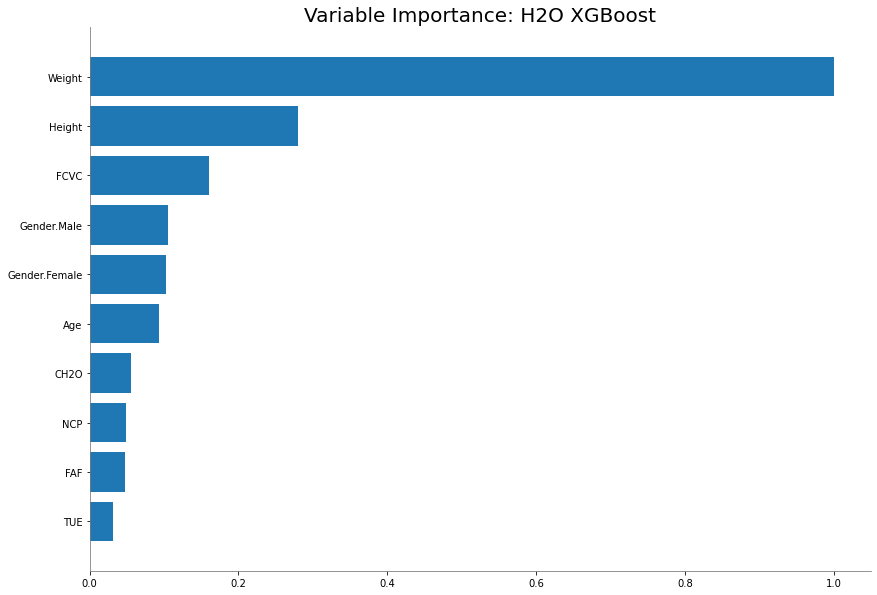

<Figure size 432x288 with 0 Axes>

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")
#Downloading the deployment ready code in mojo format. For GBM model. 

'/content/GBM_5_AutoML_1_20221107_231030.zip'

**Conclusion**

**Evaluation:**  We can evaluaate our model by using the above confusion matrix from it we can say that the error and rate of error in the cofusion matrix are significantly low suggesting that the model is working perfectly. 

Also while evaluating all the model we can see that present leader model ("**GBM_5_AutoML_1_20221107_231030**") has the least amount of **mean_per_class_error** and **logloss** as well. Which also suggests that our model fuctions perfectly.

The model also gives the most important variables as height,weight and fcvc suggesting rents dependence on it. Also we know since the model thats involved GBM handles Overfitting finely as well. Probably the reason h2o choose it in the first place.

**1. Is the relationship significant?**

Statistical significance means that there is a good chance that we are right in finding that a relationship exists between two variables. We can observe from above that the dependent variable is dependent on variables such as weight, height and gender. We can suggest that the relation ship is significant btw the dependant and independent variables.

**2. Are any model assumptions violated?**

To answer the above question we need to know answer to the below questions.

What Are the Assumptions of GBM(Gradient boosting model)?
1) Independence of observations

2) Assumptions related to the interaction depth. If set to 1, strictly additive model is assumed. As we increase the interaction depth, this assumption is relaxed.

What Are the Assumptions of XGBoost?

1)XGBoost may assume that encoded integer values for each input variable have an ordinal relationship
2)XGBoost assume that your data may not be complete (i.e. it can deal with missing values)

So from above we can say, that every while many variables are real in nature still they can be assumed into finite interval, there by it won't be problem assuming it is ordinal. Similary for GBM model every observation in the dataset as we know are differnt and not dependent on other observations as well. 

So, no assumptions of either GBM or XGBoost model are Violated here.

**3. Is there any multicollinearity in the model?**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a  model. while height and weight have the highest variable correlation it is still not enough to suggest that their is collinearity between them. 

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

From above correlation we can see that

Height  NCP       0.243672

FAF     Height    0.294709

Height  Weight    0.463136

TUE     Age      -0.296931
these variables are the one with correlation. and Independent variables have both zero covariance and correlation. While they may be dependent on each other a bit, It its still not significant enough to call them dependent varaibles.

**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**Most Importatnt Variables: **

Weight

Height

Gender

FCVC

Age

are the most importatnt variables for predicitng the obesity levels.

**6. Does the model make sense?**

Yes as we can see that the obesity level depending on weight and age etc we can undersatad that the model in sensible.

**7. Does regularization help?**

Regularization helps by ignificantly reducing the variance of the model, without substantial increase in its bias. it is reducing the variance(hence avoiding overfitting), without loosing any important properties in the data.

**8. Which independent variables are significant?**

Weight, Height, Gender,Age and FCVC are the significant variables of all.
Esp Weight is the most significant variable.


**9. Which hyperparameters are important?**

max_models and exclude_algos are the most important hyperparameters as they save us a lot of time here. 

**Reference**:

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_model.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb